# Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

## Load the data and generate summary statistics

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [146]:
df=pd.read_csv('/content/hotel_bookings.csv')

In [147]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [149]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


## Identify all missing values.

In [150]:
missing_values=df.isnull().sum()
missing_values_percentage=(df.isnull().sum()/len(df))*100
missing_values_df=pd.DataFrame({'Missing Values':missing_values,'Missing Values Percentage':missing_values_percentage})
print(missing_values_df)
print('--'*50)
#percentage of missing data

total_cells=np.prod(df.shape)
total_missing=missing_values_df['Missing Values'].sum()
missing_data_percentage=(total_missing/total_cells)*100
print(f'percentage of missing data:{missing_data_percentage}')

                                Missing Values  Missing Values Percentage
hotel                                        0                   0.000000
is_canceled                                  0                   0.000000
lead_time                                    0                   0.000000
arrival_date_year                            0                   0.000000
arrival_date_month                           0                   0.000000
arrival_date_week_number                     0                   0.000000
arrival_date_day_of_month                    0                   0.000000
stays_in_weekend_nights                      0                   0.000000
stays_in_week_nights                         0                   0.000000
adults                                       0                   0.000000
children                                     4                   0.003350
babies                                       0                   0.000000
meal                                  

<Figure size 1000x800 with 0 Axes>

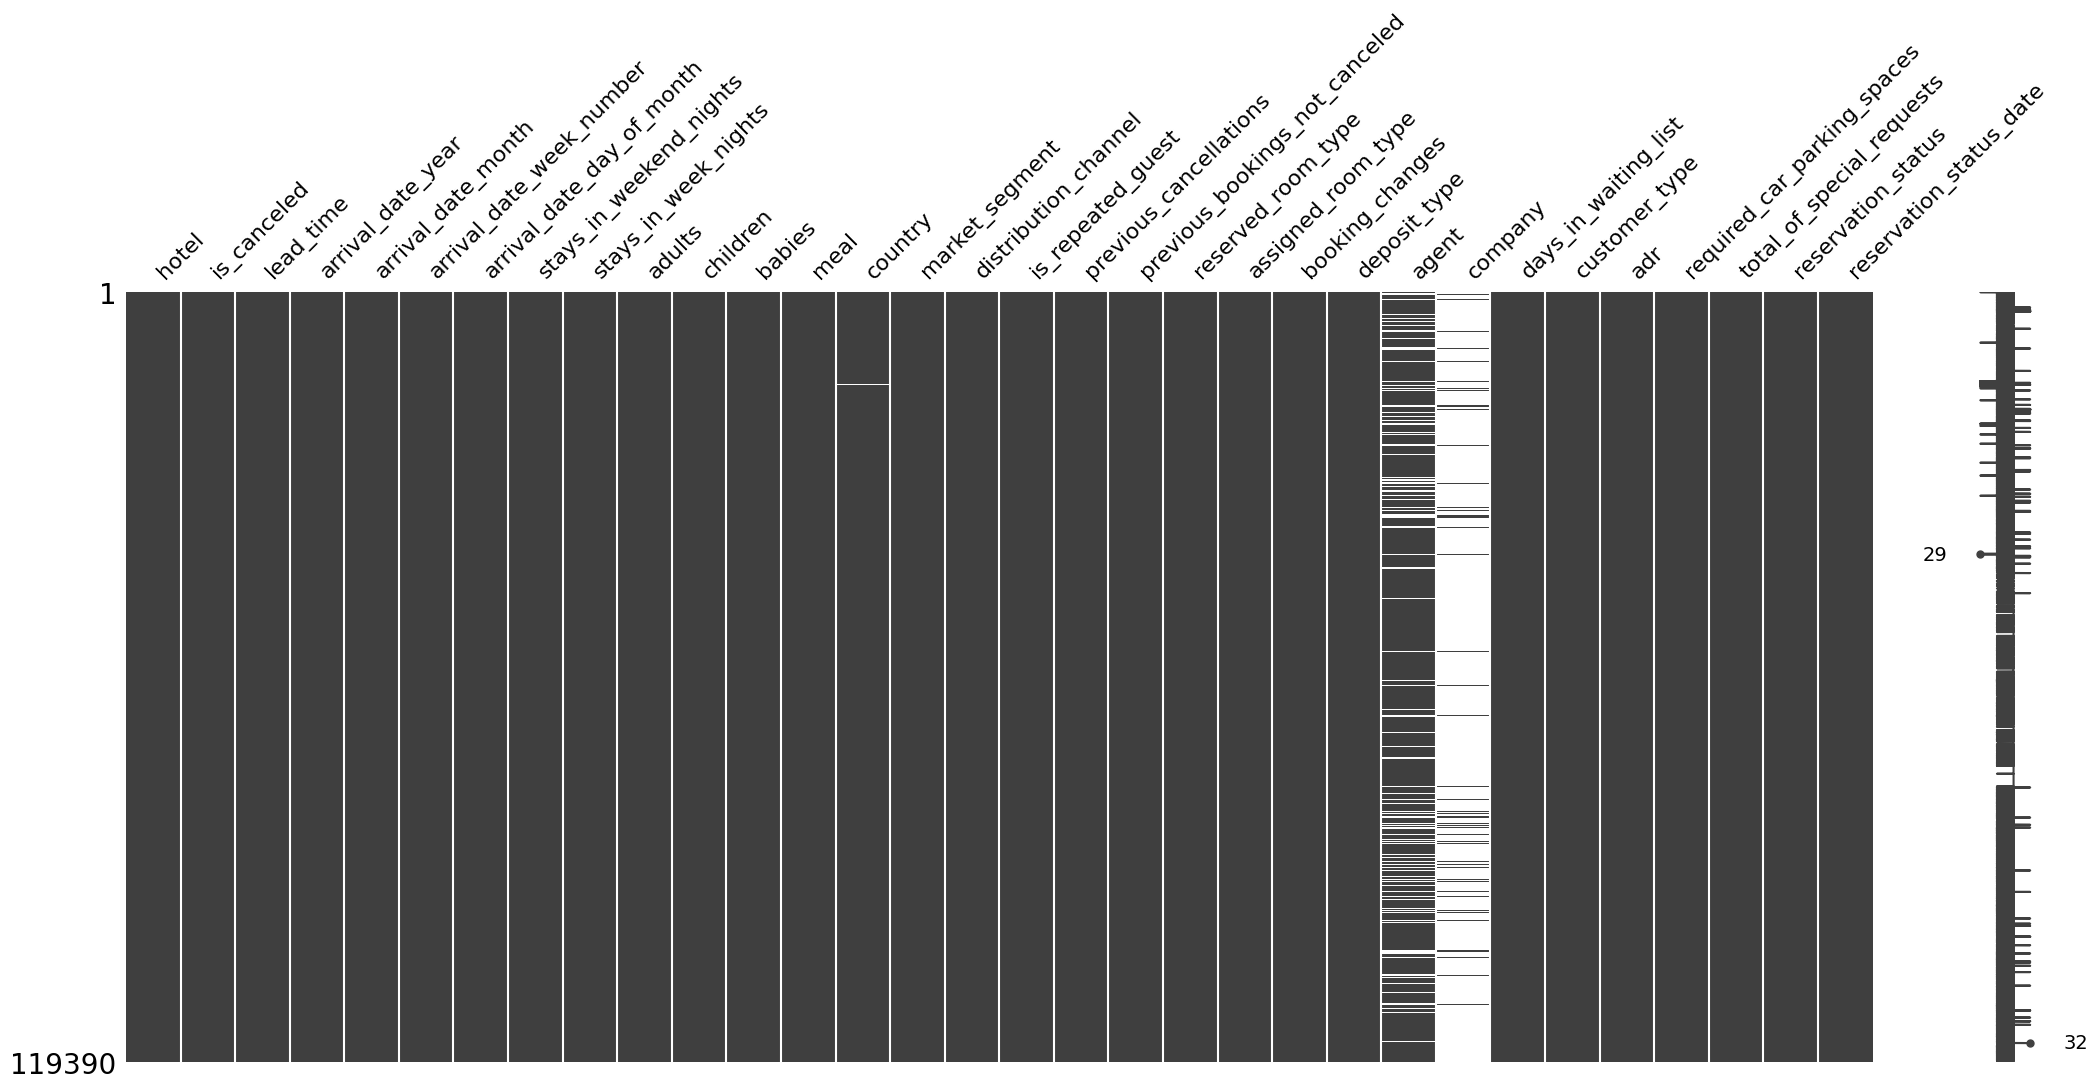

In [151]:
plt.figure(figsize=(10,8))
msno.matrix(df)
plt.show()

<Figure size 1000x800 with 0 Axes>

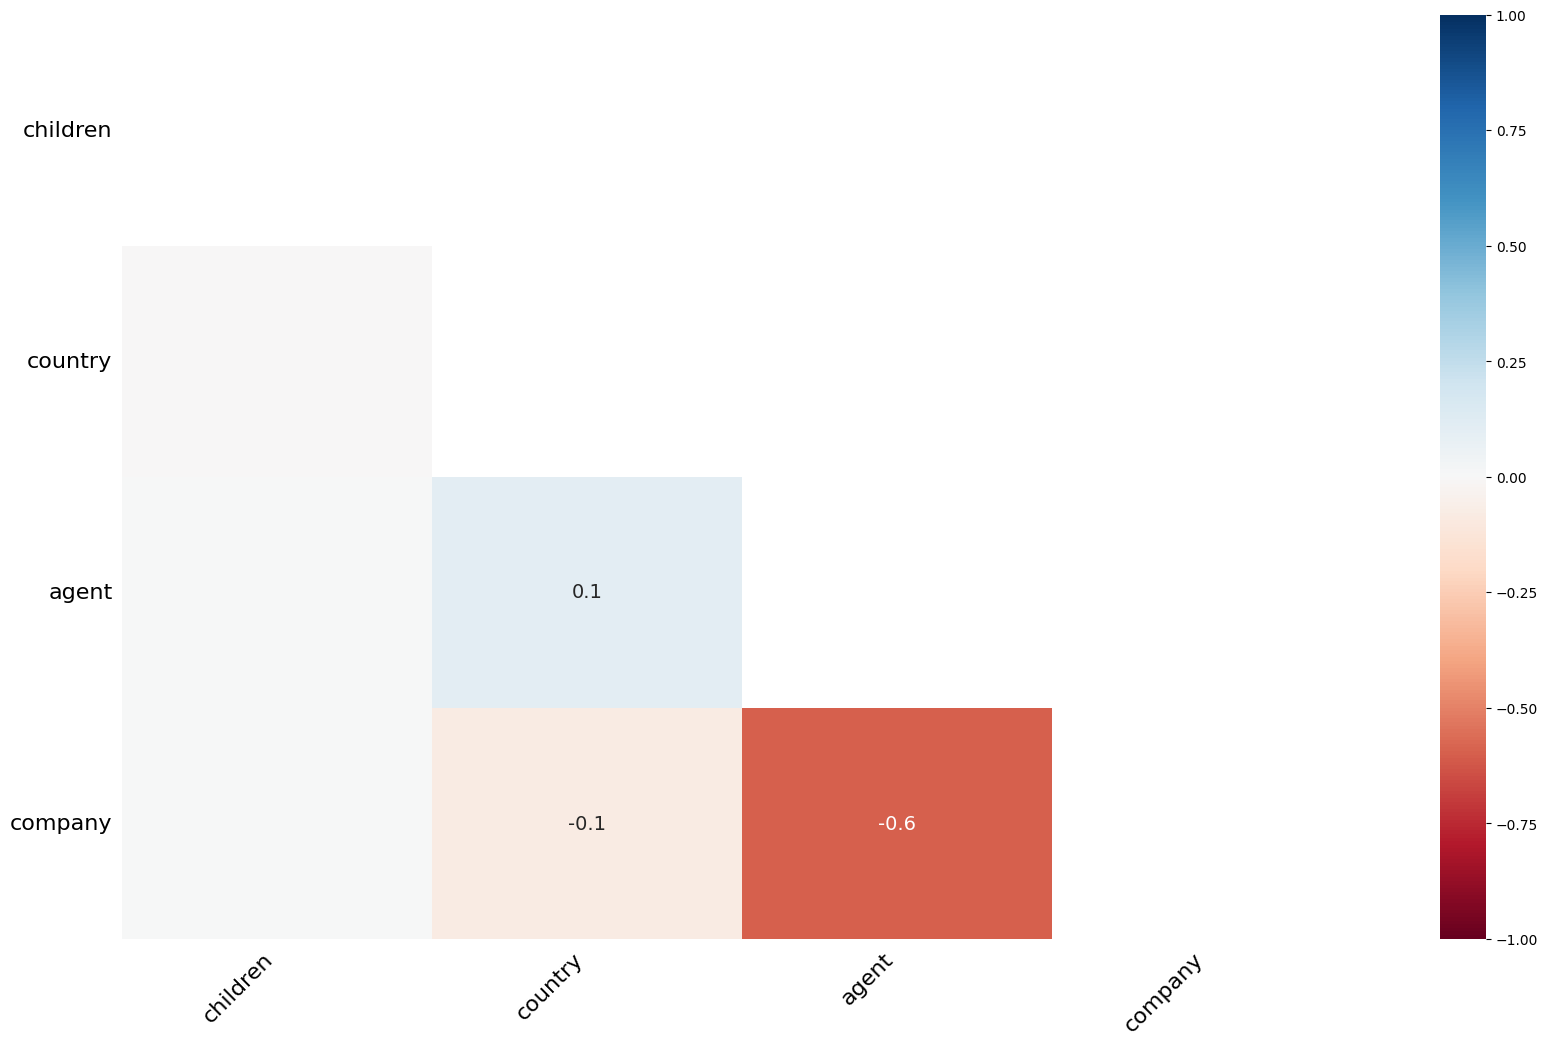

In [152]:
plt.figure(figsize=(10,8))
msno.heatmap(df)
plt.show()

## Detect outliers

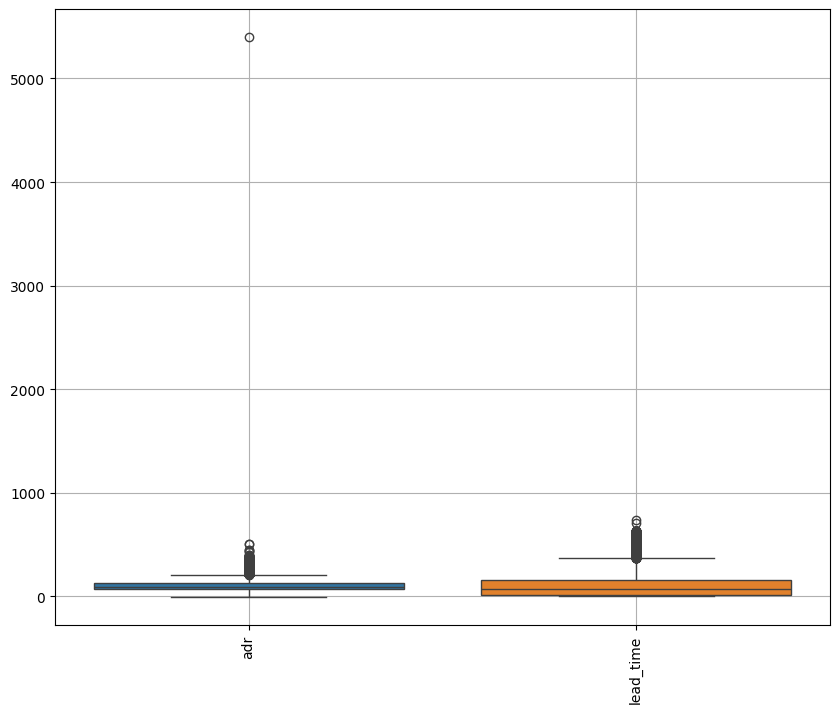

In [153]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[['adr','lead_time']])
plt.xticks(rotation=90)   # rotate x-axis labels
plt.grid(True)

plt.show()

## Document your findings

In [154]:
def check_for_neagtive(column):
  negative_values=df[df[column]<0]
  print(f'Number of negative values in {column}:{len(negative_values)}')

  return negative_values

In [155]:
for column in df.select_dtypes(include=['int64','float64']):
  check_for_neagtive(column)

Number of negative values in is_canceled:0
Number of negative values in lead_time:0
Number of negative values in arrival_date_year:0
Number of negative values in arrival_date_week_number:0
Number of negative values in arrival_date_day_of_month:0
Number of negative values in stays_in_weekend_nights:0
Number of negative values in stays_in_week_nights:0
Number of negative values in adults:0
Number of negative values in children:0
Number of negative values in babies:0
Number of negative values in is_repeated_guest:0
Number of negative values in previous_cancellations:0
Number of negative values in previous_bookings_not_canceled:0
Number of negative values in booking_changes:0
Number of negative values in agent:0
Number of negative values in company:0
Number of negative values in days_in_waiting_list:0
Number of negative values in adr:1
Number of negative values in required_car_parking_spaces:0
Number of negative values in total_of_special_requests:0


Data Quality Issues:

children: Some missing values.

company: High proportion of missing values.

agent: High proportion of missing values.

Most other columns are complete with no missing data.

adr (Average Daily Rate):

Extreme high values (> 5000).

Negative values exist (impossible in reality).

lead_time:

Outliers above 2000 days (5+ years before booking, unrealistic).

days_in_waiting_list:

A few extreme cases (> 300 days).

Other columns:

Minor outliers in children, babies, and stays_in_week_nights.

Data Imbalance

Columns such as company and agent are heavily skewed toward missing values or dominated by a single category.


# Phase 2: Data Cleaning (The Core of the Project)

## Handle Missing Values:

In [156]:
df['company']=df['company'].fillna('None')
df['agent']=df['agent'].fillna("None")

In [157]:
df['country']=df['country'].fillna("Unknown")

In [158]:
df['children']=df['children'].fillna(df['children'].median())

In [159]:
missing_values=df.isnull().sum()
missing_values_percentage=(df.isnull().sum()/len(df))*100
missing_values_df=pd.DataFrame({'Missing Values':missing_values,'Missing Values Percentage':missing_values_percentage})
print(missing_values_df)
print('--'*50)
#percentage of missing data

total_cells=np.prod(df.shape)
total_missing=missing_values_df['Missing Values'].sum()
missing_data_percentage=(total_missing/total_cells)*100
print(f'percentage of missing data:{missing_data_percentage}')

                                Missing Values  Missing Values Percentage
hotel                                        0                        0.0
is_canceled                                  0                        0.0
lead_time                                    0                        0.0
arrival_date_year                            0                        0.0
arrival_date_month                           0                        0.0
arrival_date_week_number                     0                        0.0
arrival_date_day_of_month                    0                        0.0
stays_in_weekend_nights                      0                        0.0
stays_in_week_nights                         0                        0.0
adults                                       0                        0.0
children                                     0                        0.0
babies                                       0                        0.0
meal                                  

## Remove Duplicates:

In [160]:
df.duplicated().sum()

np.int64(31994)

In [161]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,None,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,None,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,None,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,None,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,None,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,None,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,None,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,None,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,None,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [162]:
df.drop_duplicates(inplace=True)

In [163]:
df.duplicated().sum()

np.int64(0)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

## Handle Outliers:

In [165]:
df['adr'] = df['adr'].clip(upper=1000)

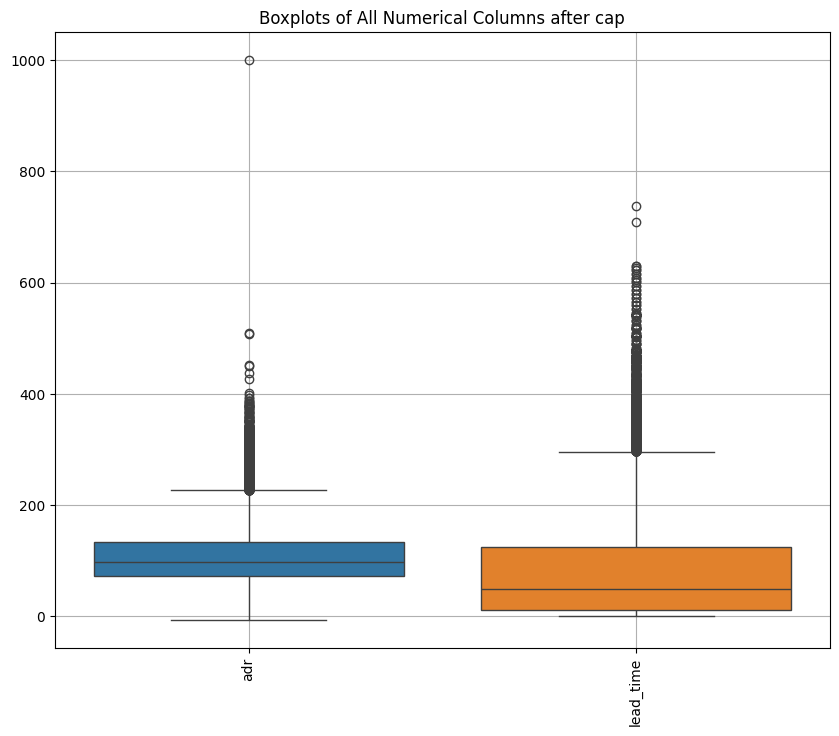

In [166]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[['adr','lead_time']])
plt.xticks(rotation=90)   # rotate x-axis labels
plt.grid(True)
plt.title("Boxplots of All Numerical Columns after cap")
plt.show()

## Fix Data Types:

In [167]:
df=df.astype({'children':'int64'})

In [168]:
print(df['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


In [169]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

df['arrival_month_num'] = pd.to_datetime(
    df['arrival_date_month'], format='%B', errors='coerce'
).dt.month

# Build the full arrival_date
df['arrival_date'] = pd.to_datetime(
    dict(
        year=df['arrival_date_year'],
        month=df['arrival_month_num'],
        day=df['arrival_date_day_of_month']
    ),
    errors='coerce'
)

df.drop(columns=['arrival_month_num'], inplace=True)

In [170]:
print(df[['arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date']].head())

   arrival_date_year arrival_date_month  arrival_date_day_of_month  \
0               2015               July                          1   
1               2015               July                          1   
2               2015               July                          1   
3               2015               July                          1   
4               2015               July                          1   

  arrival_date  
0   2015-07-01  
1   2015-07-01  
2   2015-07-01  
3   2015-07-01  
4   2015-07-01  


In [171]:
print(df[['arrival_date','reservation_status_date']].dtypes)

arrival_date               datetime64[ns]
reservation_status_date    datetime64[ns]
dtype: object


In [172]:
print("Arrival:", df['arrival_date'].min(), "→", df['arrival_date'].max())
print("Reservation status:", df['reservation_status_date'].min(), "→", df['reservation_status_date'].max())

Arrival: 2015-07-01 00:00:00 → 2017-08-31 00:00:00
Reservation status: 2014-10-17 00:00:00 → 2017-09-14 00:00:00


arrival_date

Earliest: 2015-07-01

Latest: 2017-08-31  
means this datadet is covering 2 years

reservation_status_date

Earliest: 2014-10-17

Latest: 2017-09-14

Reservation activity was recorded a bit earlier (starting October 2014) and continues slightly beyond the arrivals.
This makes sense: people book earlier than arrival, and cancellations/no-shows can be recorded after the planned arrival.

# Phase 3: Feature Engineering & Preprocessing

## Create New Features:

In [173]:
df['total_guests']=df['adults']+df['children']+df['babies']
df['total_nights']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df['is_family']=((df['babies']>0)|(df['children']>0)).astype(int)

In [174]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_guests,total_nights,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2,0


## Encode Categorical Variables:

In [175]:
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print(col, ":", df[col].nunique())

hotel : 2
arrival_date_month : 12
meal : 5
country : 178
market_segment : 8
distribution_channel : 5
reserved_room_type : 10
assigned_room_type : 12
deposit_type : 3
agent : 334
company : 353
customer_type : 4
reservation_status : 3


In [176]:
low_card_cols = [
    "hotel", "arrival_date_month", "meal", "market_segment",
    "distribution_channel", "reserved_room_type", "assigned_room_type",
    "deposit_type", "customer_type"
]

high_card_cols = ["country"]

In [177]:
df = pd.get_dummies(df, columns=low_card_cols, drop_first=False, dtype="int8")

In [178]:
for col in high_card_cols:
    freqs = df[col].value_counts(normalize=True)
    df[col + "_freq"] = df[col].map(freqs).fillna(0.0)
    df = df.drop(columns=[col])

In [179]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,country_freq
0,0,342,2015,27,1,0,0,2,0,0,...,0,0,1,0,0,0,0,1,0,0.314122
1,0,737,2015,27,1,0,0,2,0,0,...,0,0,1,0,0,0,0,1,0,0.314122
2,0,7,2015,27,1,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0.119376
3,0,13,2015,27,1,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0.119376
4,0,14,2015,27,1,0,2,2,0,0,...,0,0,1,0,0,0,0,1,0,0.119376


## CRITICAL STEP:

In [180]:
df.drop(columns=['reservation_status','reservation_status_date'],inplace=True)

## Final Preparation:

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
x=df.drop(columns=['is_canceled'])
y=df['is_canceled']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)